In [1]:
using DataFrames, CSV, Statistics, CairoMakie

### Make boxplots of time spent on each phase

In [3]:
# Load the df
spent_time_per_section = DataFrame(CSV.File("../Data/Dataframes/time_spent_per_section.csv"))

show(first(spent_time_per_section, 10),allcols=true)

10×16 DataFrame
 Row │ User ID  Introduction  Placement  Pin Entry  Authentication  Lab Selection  Lab Initiation  module0  module1  module2  module3  module4  module5  module6  module7  Total   
     │ Int64    Float64       Float64    Float64    Float64         Float64        Float64         Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │      88          8.68       3.14       5.54             0.0           3.95            9.27     9.98     8.96     6.59     7.45     8.57    11.82     9.39     2.26    97.5
   2 │     102          8.68      33.86      45.94             0.0          16.17            6.48   848.87   399.21   385.71    65.58   250.26   405.45    96.35    84.35  2650.48
   3 │     103          8.68      32.54      16.74             0.0           2.63      

312×2 DataFrame
 Row │ variable  value   
     │ String    Float64 
─────┼───────────────────
   1 │ module0      9.98
   2 │ module0    848.87
   3 │ module0     17.03
   4 │ module0    477.22
   5 │ module0   1041.77
   6 │ module0    498.82
   7 │ module0     26.27
   8 │ module0    317.23
  ⋮  │    ⋮         ⋮
 306 │ module7     50.93
 307 │ module7     61.7
 308 │ module7      3.29
 309 │ module7     46.23
 310 │ module7     47.77
 311 │ module7     36.4
 312 │ module7     10.72
         297 rows omitted[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

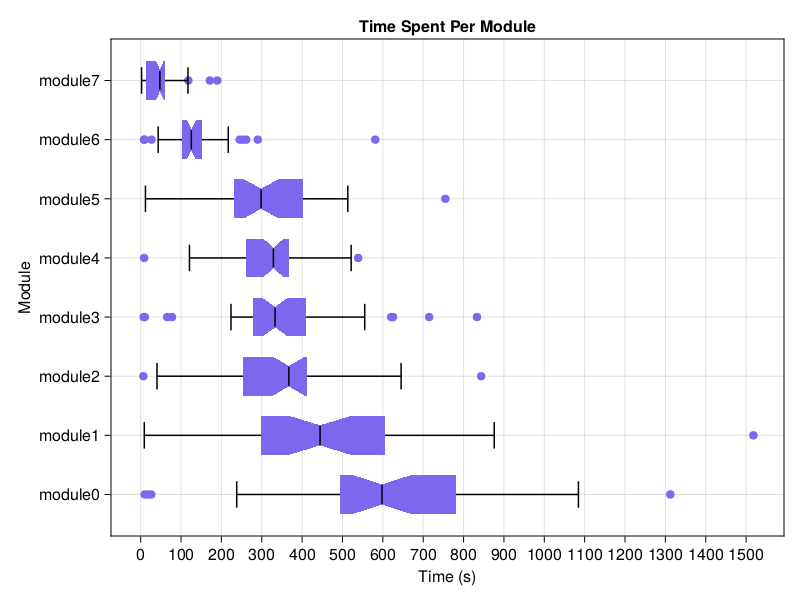

In [41]:
let
    # stack the time values into one long column, first column now labels what section it is on.
    # This is done because the makie boxplot function is a little strange
    stacked = stack(spent_time_per_section[:,8:end-1], 1:8)
    name_to_index_map = Dict()
    for (index,val) in enumerate(names(spent_time_per_section)[2:end])
        name_to_index_map[val] = index
    end
    index_to_name_map = Dict(value => key for (key, value) in name_to_index_map)
    # Map the variable names to numbers
    xs = map(x -> name_to_index_map[x], stacked[:,"variable"])

    # Show the constructed lists
    show(stacked)
    show(xs)

    # Make the figure
    f = Figure()
    ax = Axis(f[1,1],
        title="Time Spent Per Module",
        xlabel="Time (s)",
        ylabel="Module",
        xticks=0:100:1500,
        yticks=(unique(xs),map(x -> index_to_name_map[x], unique(xs))))
    boxplot!(ax, xs, stacked[!,2],
            orientation=:horizontal,
            show_notch=true,
            width=0.8,
            whiskerwidth=0.7,
            color=:mediumslateblue)
    # Return the figure
    f
end